In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

In [2]:
data = pd.read_excel("charlie_feeding_log.xlsx", sheet_name='Sheet1')
data.head()

,Day,Feeding,Date,Start Time,Nursed Breast (L/R/Both),Quality,Stool (color),Wet (color),Sleep Quality (Night Before)
0,1,1,2020-05-06,09:15:00,L,fair,NaN,NaN,poor
1,1,2,2020-05-06,12:00:00,L,poor,NaN,NaN,poor
2,1,3,2020-05-06,15:00:00,L,poor,NaN,NaN,poor
3,1,4,2020-05-06,17:30:00,L,fair,black,NaN,poor
4,1,5,2020-05-06,21:20:00,L,good,black,rust,poor


In [3]:
data.index = data.apply(lambda r : pd.datetime.combine(r['Date'], r['Start Time']), 1)
data['Feeding'] = True
data["Quality Numeric"] = data.Quality.replace({"poor": 1, "fair": 2, "good": 3})
data["Poopy"] = ~data['Stool (color)'].isnull()
data["Wet"] = ~data['Wet (color)'].isnull()
data['datefmt'] = data['Date'].map(lambda t: t.strftime('%Y-%m-%d'))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comi

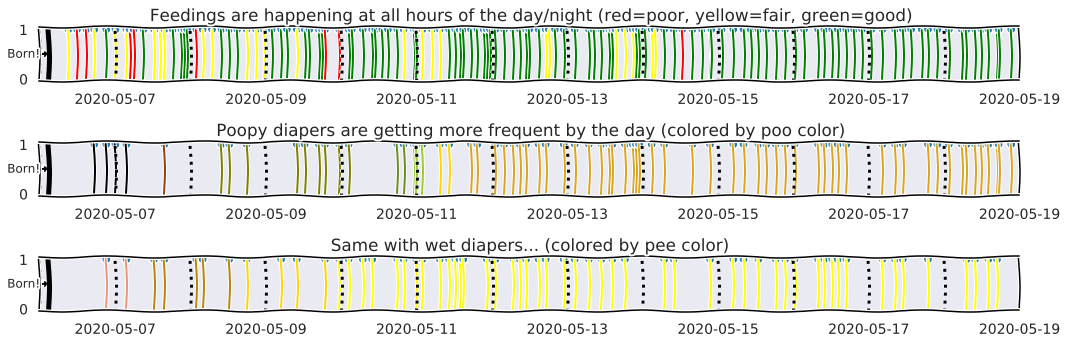

In [4]:
plt.xkcd()
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15,5))

def addBorn(ax):
    ax.axvline(pd.Timestamp('05/06/20 2:45AM'), color='k', linewidth = 5)
    bbox_props = dict(boxstyle="rarrow", ec="k", lw=.1)
    t = ax.text(pd.Timestamp('05/05/20 7:00PM'), .5, "Born!", ha="center", va="center", rotation=0,
                 size=12)
    ax.arrow(pd.Timestamp('05/05/20 7:00PM'), .5, .28, 0, head_width=0.1, head_length=0.025, fc='k', ec='k')

for idx, row in data.iterrows():
    if row.Quality == "poor":
        color = "red"
    if row.Quality == "fair":
        color = "yellow"
    if row.Quality == "good":
        color = "green"
    ax1.stem([row.name], [1], linefmt = color)
addBorn(ax1)
ax1.set_title('Feedings are happening at all hours of the day/night (red=poor, yellow=fair, green=good)')


for idx, row in data.iterrows():
    if not pd.isnull(row['Stool (color)']):
        if row['Stool (color)'] == "black":
            color = "black"
        elif row['Stool (color)'] == "black/brown":
            color = "saddlebrown"
        elif row['Stool (color)'] == "brown/green":
            color = "olive"
        elif row['Stool (color)'] == "green":
            color = "olivedrab"
        elif row['Stool (color)'] == "green/yellow":
            color = "yellowgreen"
        elif row['Stool (color)'] == "dark yellow":
            color = "gold"
        elif row['Stool (color)'] == "yellow":
            color = "goldenrod"
        ax2.stem([row.name], [1], linefmt = color)
ax2.set_title('Poopy diapers are getting more frequent by the day (colored by poo color)')
addBorn(ax2)

for idx, row in data.iterrows():
    if not pd.isnull(row['Wet (color)']):
        if row['Wet (color)'] == "rust":
            color = "darksalmon"
        elif row['Wet (color)'] == "rust/yellow":
            color = "darkgoldenrod"
        elif row['Wet (color)'] == "dark yellow":
            color = "gold"
        elif row['Wet (color)'] == "yellow":
            color = "yellow"
        elif row['Wet (color)'] == "light yellow":
            color = "yellow"
        else: 
            color = "red"
        ax3.stem([row.name], [1], linefmt = color)
ax3.set_title('Same with wet diapers... (colored by pee color)')
addBorn(ax3)

#date_range = pd.date_range(start='05/06/20', end='05/14/20', freq = 'D')
timestamps = ['05/06/20', '05/07/20', '05/08/20', '05/09/20', '05/10/20', '05/11/20', '05/12/20', '05/13/20', '05/14/20', '05/15/20', '05/16/20', '05/17/20', '05/18/20', '05/19/20']
for t in timestamps:
    ax1.axvline(pd.Timestamp(t), color='k', linewidth = 3, linestyle = ":")
    ax2.axvline(pd.Timestamp(t), color='k', linewidth = 3, linestyle = ":")
    ax3.axvline(pd.Timestamp(t), color='k', linewidth = 3, linestyle = ":")
    
ax1.set_xlim(pd.Timestamp(timestamps[0]), pd.Timestamp(timestamps[-1]))
ax2.set_xlim(pd.Timestamp(timestamps[0]), pd.Timestamp(timestamps[-1]))
ax3.set_xlim(pd.Timestamp(timestamps[0]), pd.Timestamp(timestamps[-1]))

plt.tight_layout()

Text(0.5, 1.0, 'Total poopy/wet diapers')

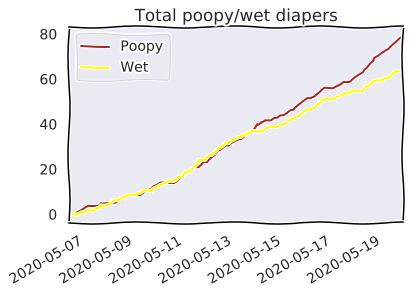

In [5]:
ax4 =  (~data['Stool (color)'].isnull()).cumsum().plot(label = 'Poopy', color = 'brown')
(~data['Wet (color)'].isnull()).cumsum().plot(label = 'Wet', color = 'yellow', ax = ax4)
plt.legend()
plt.title('Total poopy/wet diapers')

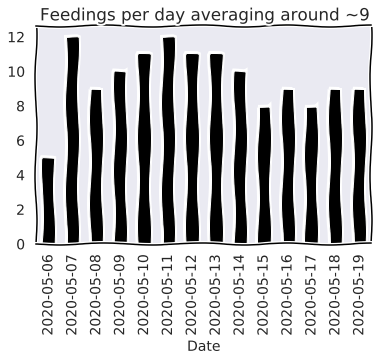

In [6]:
data.groupby('datefmt')['Feeding'].sum().plot(kind = 'bar', color = 'k')
plt.title('Feedings per day averaging around ~9')
plt.xlabel('Date');

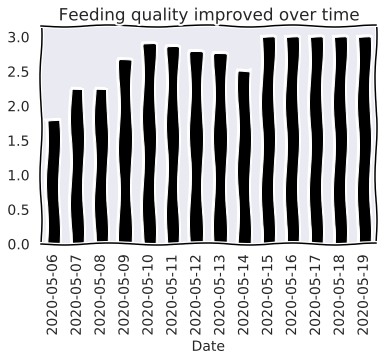

In [7]:
data.groupby('datefmt')['Quality Numeric'].mean().plot(kind = 'bar', color = 'k')
plt.title('Feeding quality improved over time')
plt.xlabel('Date');

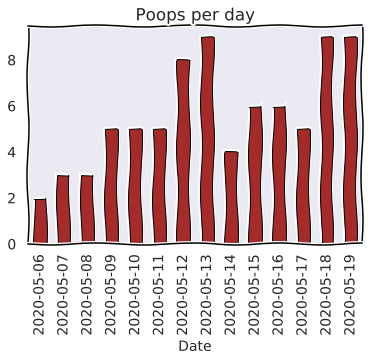

In [8]:
data.groupby('datefmt')['Poopy'].sum().plot(kind = 'bar', color = 'brown', edgecolor = 'k')
plt.title('Poops per day')
plt.xlabel('Date');

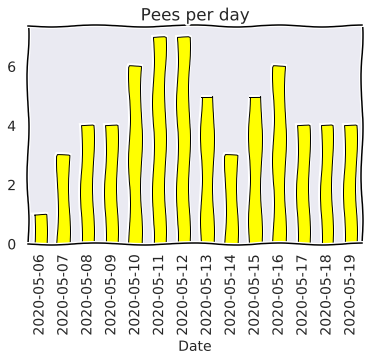

In [9]:
data.groupby('datefmt')['Wet'].sum().plot(kind = 'bar', color = 'yellow', edgecolor = 'k')
plt.title('Pees per day')
plt.xlabel('Date');

Text(0.5, 1.0, 'Total number of feedings by time of day')

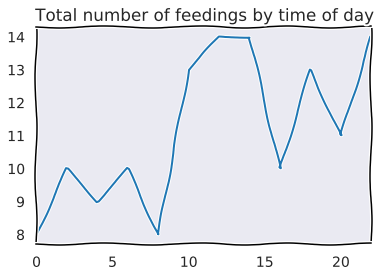

In [10]:
resampled_data = data.resample("2H").sum()
resampled_data.groupby(resampled_data.index.hour).sum()['Feeding'].plot()
plt.title('Total number of feedings by time of day')

In [11]:
weight = pd.read_excel("charlie_feeding_log.xlsx", sheet_name='Sheet2')
weight.head()

,Date,Start Time,Weight (oz)
0,2020-05-06,02:45:00,102.0
1,2020-05-09,15:00:00,89.0
2,2020-05-13,14:00:00,98.0
3,2020-05-17,13:38:00,100.6
4,2020-05-18,05:45:00,101.4


In [12]:
weight.index = weight.apply(lambda r : pd.datetime.combine(r['Date'], r['Start Time']), 1)
weight['datefmt'] = weight['Date'].map(lambda t: t.strftime('%Y-%m-%d'))

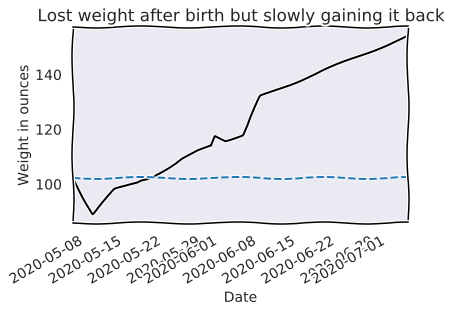

In [13]:
weight['Weight (oz)'].plot(kind = 'line', color = 'k')
plt.axhline(102, linestyle = '--')
plt.title('Lost weight after birth but slowly gaining it back');
plt.xlabel('Date');
plt.ylabel('Weight in ounces');

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


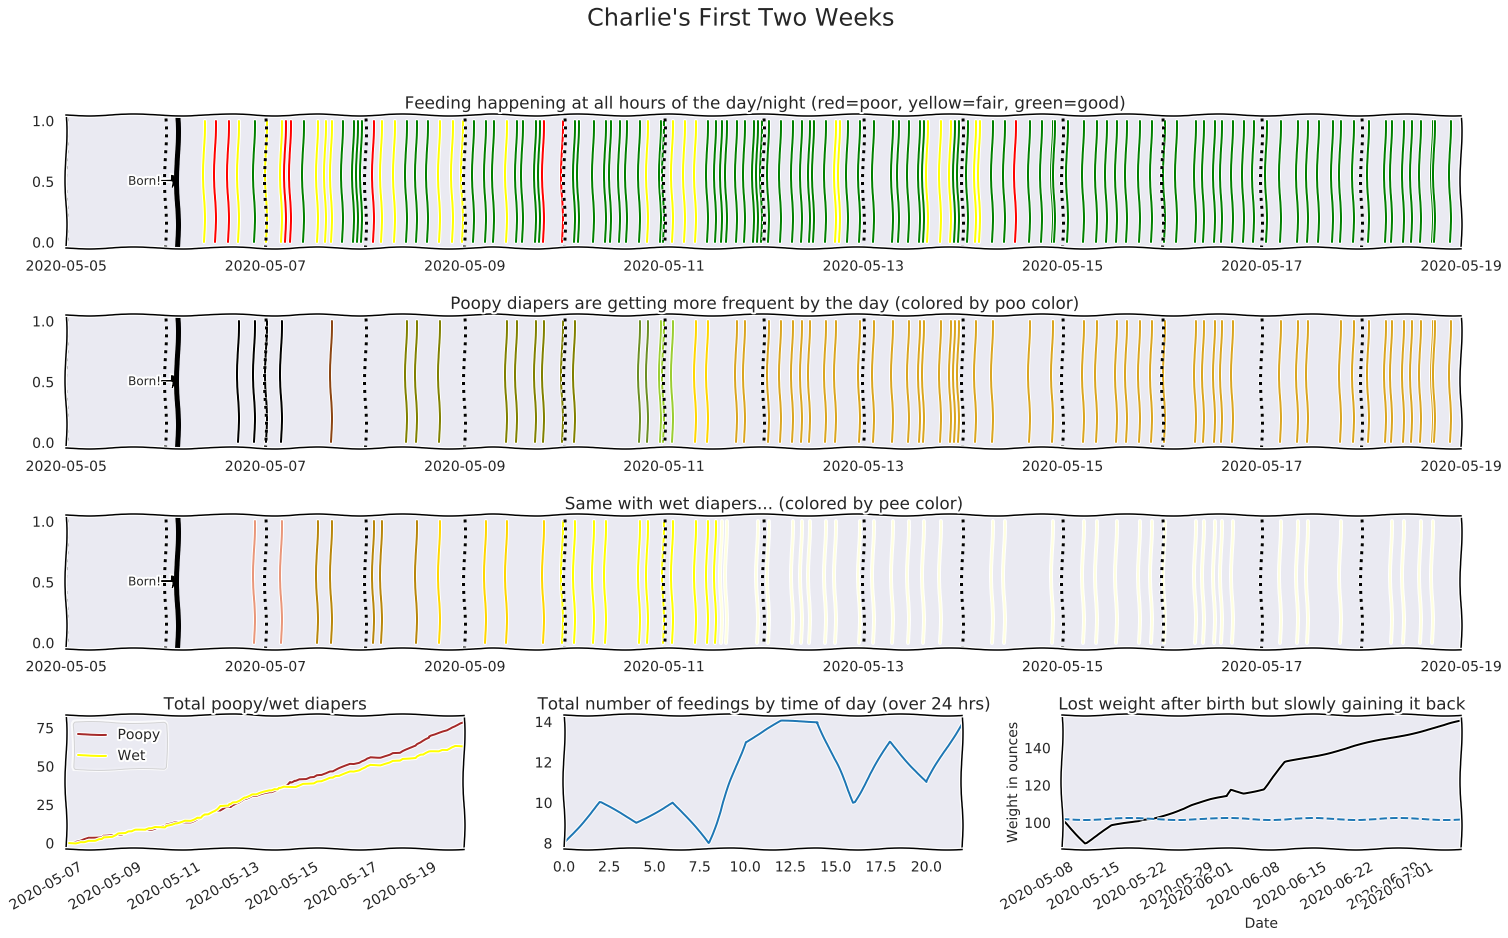

In [14]:
fig = plt.figure(figsize = (25, 15))
gs = fig.add_gridspec(4, 3)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :])
ax3 = fig.add_subplot(gs[2, :])
ax4 = fig.add_subplot(gs[3, 0])
ax5 = fig.add_subplot(gs[3, 1])
ax6 = fig.add_subplot(gs[3, 2])

fig.suptitle("Charlie's First Two Weeks", fontsize=24)

def addBorn(ax):
    ax.axvline(pd.Timestamp('05/06/20 2:45AM'), color='k', linewidth = 5)
    bbox_props = dict(boxstyle="rarrow", ec="k", lw=.1)
    t = ax.text(pd.Timestamp('05/05/20 7:00PM'), .5, "Born!", ha="center", va="center", rotation=0,
                 size=12)
    ax.arrow(pd.Timestamp('05/05/20 7:00PM'), .5, .28, 0, head_width=0.1, head_length=0.025, fc='k', ec='k')

for idx, row in data.iterrows():
    if row.Quality == "poor":
        color = "red"
    if row.Quality == "fair":
        color = "yellow"
    if row.Quality == "good":
        color = "green"
    ax1.stem([row.name], [1], linefmt = color, markerfmt=" ")
addBorn(ax1)
ax1.set_title('Feeding happening at all hours of the day/night (red=poor, yellow=fair, green=good)')


for idx, row in data.iterrows():
    if not pd.isnull(row['Stool (color)']):
        if row['Stool (color)'] == "black":
            color = "black"
        elif row['Stool (color)'] == "black/brown":
            color = "saddlebrown"
        elif row['Stool (color)'] == "brown/green":
            color = "olive"
        elif row['Stool (color)'] == "green":
            color = "olivedrab"
        elif row['Stool (color)'] == "green/yellow":
            color = "yellowgreen"
        elif row['Stool (color)'] == "dark yellow":
            color = "gold"
        elif row['Stool (color)'] == "yellow":
            color = "goldenrod"
        ax2.stem([row.name], [1], linefmt = color, markerfmt = " ")
ax2.set_title('Poopy diapers are getting more frequent by the day (colored by poo color)')
addBorn(ax2)

for idx, row in data.iterrows():
    if not pd.isnull(row['Wet (color)']):
        if row['Wet (color)'] == "rust":
            color = "darksalmon"
        elif row['Wet (color)'] == "rust/yellow":
            color = "darkgoldenrod"
        elif row['Wet (color)'] == "dark yellow":
            color = "gold"
        elif row['Wet (color)'] == "yellow":
            color = "yellow"
        elif row['Wet (color)'] == "light yellow":
            color = "lightyellow"
        else: 
            color = "red"
        ax3.stem([row.name], [1], linefmt = color, markerfmt = " ")
ax3.set_title('Same with wet diapers... (colored by pee color)')
addBorn(ax3)

#date_range = pd.date_range(start='05/06/20', end='05/14/20', freq = 'D')
timestamps = ['05/05/20', '05/06/20', '05/07/20', '05/08/20', '05/09/20', '05/10/20', '05/11/20', '05/12/20', '05/13/20', '05/14/20', '05/15/20', '05/16/20', '05/17/20', '05/18/20', '05/19/20']
for t in timestamps:
    ax1.axvline(pd.Timestamp(t), color='k', linewidth = 3, linestyle = ":")
    ax2.axvline(pd.Timestamp(t), color='k', linewidth = 3, linestyle = ":")
    ax3.axvline(pd.Timestamp(t), color='k', linewidth = 3, linestyle = ":")
    
ax1.set_xlim(pd.Timestamp(timestamps[0]), pd.Timestamp(timestamps[-1]))
ax2.set_xlim(pd.Timestamp(timestamps[0]), pd.Timestamp(timestamps[-1]))
ax3.set_xlim(pd.Timestamp(timestamps[0]), pd.Timestamp(timestamps[-1]))

(~data['Stool (color)'].isnull()).cumsum().plot(label = 'Poopy', color = 'brown', ax = ax4)
(~data['Wet (color)'].isnull()).cumsum().plot(label = 'Wet', color = 'yellow', ax = ax4)
ax4.legend()
ax4.set_title('Total poopy/wet diapers')

resampled_data = data.resample("2H").sum()
resampled_data.groupby(resampled_data.index.hour).sum()['Feeding'].plot(ax = ax5)
ax5.set_title('Total number of feedings by time of day (over 24 hrs)')

weight['Weight (oz)'].plot(kind = 'line', color = 'k', ax = ax6)
ax6.axhline(102, linestyle = '--')
ax6.set_title('Lost weight after birth but slowly gaining it back');
ax6.set_xlabel('Date');
ax6.set_ylabel('Weight in ounces');

fig.subplots_adjust(hspace=.5, wspace=.25)
#plt.tight_layout()

In [27]:
weight['Weight (oz)'].resample('W').mean().values / 16

array([5.96875 , 6.20625 , 6.4975  , 7.065625, 7.30625 , 8.25    ,
            nan,      nan, 9.625   ])

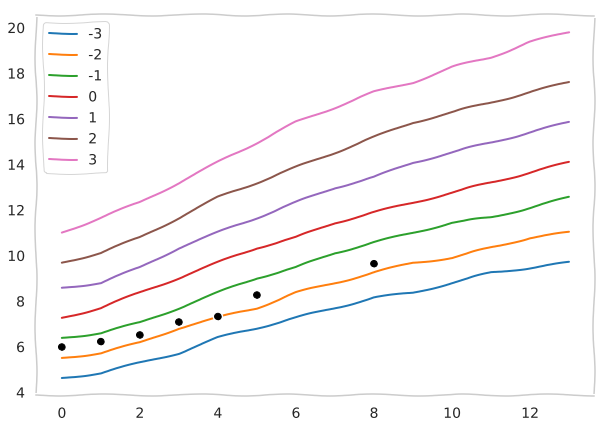

In [30]:
import numpy as np
sns.set_style('whitegrid')
fig = plt.figure(figsize = (10, 7))
norm_weight = pd.read_csv('wfa_boys_0_13_zscores.txt', sep = '\t').drop(['L', 'M', 'S'], axis = 1)
norm_weight.columns = ['Week', -3, -2, -1, 0, 1, 2, 3]
for col in np.arange(-3, 4):
    norm_weight[col] = norm_weight[col] * 2.2
    plt.plot(norm_weight[col], label = col)
plt.legend()

# weight['Weight (oz)'].plot(kind = 'line', color = 'k')
# plt.axhline(102, linestyle = '--')
# plt.title('Lost weight after birth but slowly gaining it back');
# plt.xlabel('Date');
# plt.ylabel('Weight in ounces');
plt.plot(weight['Weight (oz)'].resample('W').mean().values / 16, 'o', c = 'k')

In [16]:
weight['Weight (oz)'].resample('W').last().values / 16

array([5.5625, 6.2875, 6.7125, 7.3375, 7.375 , 8.25  ,    nan,    nan,
       9.625 ])

In [17]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import numpy as np

#assessment = np.atleast_2d(np.diff(weight.index)).T
assessment = np.atleast_2d(weight.index.to_pydatetime().values).T
assessment_results = weight['Weight (oz)'].values

for i in range(1, len(assessment)+1):
    
    X = assessment[:i]

    # Observations
    y = assessment_results[:i]

    # Mesh the input space for evaluations of the real function, the prediction and
    # its MSE
    x = np.atleast_2d(weight.index.to_pydatetime().values).T # np.atleast_2d(np.linspace(303300000000000, 92700000000000, 100)).T

    # Instantiate a Gaussian Process model
    kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
    gp = GaussianProcessRegressor(
        kernel=kernel, 
        n_restarts_optimizer=9,
    )

    # Fit to data using Maximum Likelihood Estimation of the parameters
    gp.fit(X, y)

    # Make the prediction on the meshed x-axis (ask for MSE as well)
    y_pred, sigma = gp.predict(x, return_std=True)

    # Plot the function, the prediction and the 95% confidence interval based on
    # the MSE
    plt.figure()
    #plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
    plt.plot(X, y, 'r.', markersize=10, label='Observations')
    plt.plot(x, y_pred, 'b-', label='Prediction')
    plt.fill(np.concatenate([x, x[::-1]]),
             np.concatenate([y_pred - 1.9600 * sigma,
                            (y_pred + 1.9600 * sigma)[::-1]]),
             alpha=.5, fc='b', ec='None', label='95% confidence interval')
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    #plt.ylim(-10, 20)
    plt.legend(loc='upper left')
    plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'values'